# **Assignment 2: House price prediction accodring to the size of the house using Linear Regression.**
## **Submitted By: Krishna Nath**
## **Date: 19.08.2025**

## 1. Importing the libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression


- numpy: helps in handling arrays & numerical data
- pandas is used to load and process the dataset (Housing.csv).
- matplotlib.pyplot: used to draw plots (scatter, line, loss curves)

## 2. Loading Dataset :

In [ ]:
data = pd.read_csv("/Housing.csv")

- pd.read_csv("Housing.csv") loads the dataset file into a pandas DataFrame called data.

    ** Now the dataset is structured in rows (samples) and columns (features + output)**

In [ ]:
print("Dataset sample:\n", data.head())
print("\nDataset info:\n")
print(data.info())

Dataset sample:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 t

- print("Dataset sample:\n", ...) → Prints a custom message "Dataset sample:" followed by the first 5 rows of the dataset.
- data.head() → By default, shows the top 5 rows of the DataFrame. This helps us preview the dataset structure, column names, and values.

         print("\nDataset info:\n")

- Prints the title "Dataset info:" so thadata.info() → Gives a summary of the dataset, including:

- data.info() → Gives a summary of the dataset, including:
  - Number of rows and columns.
  - Column names.
  - Data types of each column (int, float, object).
  - Count of non-null (non-missing) values in each column.

In [ ]:
le = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = le.fit_transform(data[col])

         le = LabelEncoder()

Here, we are creating an object le of the LabelEncoder class from sklearn.preprocessing.

-> Purpose: LabelEncoder converts categorical (text) data into numeric values, which is necessary because machine learning models cannot work directly with text.

Example:

"yes" → 1

"no" → 0

      for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']:

This line loops through a list of column names that contain categorical (textual) values in the dataset.

These columns are features like "mainroad", "guestroom", etc., which contain values such as "yes/no", "furnished/unfurnished", etc.

     data[col] = le.fit_transform(data[col])

For each column in the loop:

le.fit_transform(data[col]) converts the categorical values into numbers.

Example:

"yes", "no", "yes", "no" → [1, 0, 1, 0]

The transformed numeric values replace the original column in the dataset (data[col]).

In [ ]:
X = data.drop("price", axis=1).values
y = data["price"].values

- data.drop("price", axis=1) → Removes the "price" column from the dataset because "price" is the target/output variable we want to predict.

- axis=1 → means drop along columns (if it was axis=0, it would mean rows).

- .values → converts the remaining columns into a NumPy array for easier handling by machine learning models.

- X → This stores all the independent/input features (like area, bedrooms, etc.) which will be used for prediction.
-  X contains the dataset without the "price" column.


                 y = data["price"].values

- data["price"] → Selects only the "price" column, which is the target/output variable.

- .values → Converts it into a NumPy array.

- y → Stores the target values (the actual house prices) corresponding to each row of X.
- y contains the dependent variable we want the model to learn and predict.

In simple words:

X → Input features (everything except price).

y → Output labels (price).

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

- StandardScaler is used to standardize (normalize) the dataset features so that each feature has:

   - Mean = 0

   - Standard Deviation = 1

   fit_transform() does two steps at once:

- Fit → Calculate the mean and standard deviation of each feature (column) in X.

- Transform → Apply the formula to standardize:
	​
  
  X_scaled = (X - mean/ std_dev)

Finally, the standardized version of X is stored back into X.

Now, all columns in X are scaled uniformly

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This function comes from scikit-learn (from sklearn.model_selection import train_test_split) and is used to split the dataset into training set and testing set.
- X → Features (independent variables, like area, bedrooms, etc.)

- y → Target (dependent variable, here it’s price)

Now, the parameters:

    test_size=0.2

This means 20% of the dataset will be used for testing, and the remaining 80% will be used for training.

    random_state=42
Ensures reproducibility. If you run the code multiple times with the same random state, the split will always be the same. Without it, you may get different splits each time.

- Returned values
  
  This function returns 4 objects:

   -  X_train → Training features (80% of X)

   -  X_test → Testing features (20% of X)

   - y_train → Training labels (80% of y)

   - y_test → Testing labels (20% of y)

In [ ]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Gradients
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)

            # Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Loss (Mean Squared Error)
            loss = (1/(2*n_samples)) * np.sum(error**2)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss}")

- Defines a new Python class named LinearRegressionScratch.

- This class is a custom implementation of Linear Regression from scratch (without using scikit-learn’s built-in model).

          def __init__(self, lr=0.01, epochs=1000):

- This is the constructor method (__init__) of the class.

               lr=0.01
- learning rate (how big each step in gradient descent will be). Default is 0.01.

          epochs=1000
-  number of iterations for gradient descent. Default is 1000.

                  self.lr = lr
                  self.epochs = epochs
- Stores the lr and epochs values inside the object (self).

So, every object of this class knows what learning rate and epochs to use.

           self.weights = None
           self.bias = None
- weights will hold the coefficients of the model (one for each feature). Initially set to None.

- bias will hold the intercept term of the model. Initially set to None.

            self.loss_history = []
- Initializes an empty list to store the loss value at each epoch.

- Useful for plotting learning curves and checking convergence.

                    def fit(self, X, y):
- Defines the fit method that will train the model on training data.

   - X: Feature matrix (shape [n_samples, n_features]).

   - y: Target values (shape [n_samples]).

                  n_samples, n_features = X.shape
- Extracts number of samples (n_samples) and number of features (n_features) from dataset X.

Example: if X is (100, 3), then n_samples=100, n_features=3.

           n_samples, n_features = X.shape
- Extracts number of samples (n_samples) and number of features (n_features) from dataset X.

Example: if X is (100, 3), then n_samples=100, n_features=3.

                   self.bias = 0
Initializes the bias term (intercept) to 0.

          for i in range(self.epochs):
- Starts a loop that runs for the specified number of epochs.

- Each iteration is one step of gradient descent.

         y_pred = np.dot(X, self.weights) + self.bias
- Computes predictions.

           np.dot(X, self.weights)
- performs matrix multiplication between input X and weights.

- Adds bias to shift predictions.

           y_pred = predicted outputs of the current model.

             error = y_pred - y
- Computes the difference between predicted and actual values.

- This is the residual (error term).

### Gradients
            dw = (1/n_samples) * np.dot(X.T, error)
- Computes the gradient of the loss function w.r.t. weights.

- X.T → transpose of X.

- np.dot(X.T, error) → sums contribution of errors for each feature.

- Divided by n_samples to take the average (mean gradient).

- dw tells how much to adjust each weight.

       db = (1/n_samples) * np.sum(error)

- Computes the gradient of the loss function w.r.t. bias.

- Takes the mean of the errors.

- db tells how much to adjust the bias.

### Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
- Updates weights and bias using Gradient Descent rule:

- New weight = Old weight − (Learning Rate × Gradient).

- This step gradually reduces loss.

### Loss (Mean Squared Error)
            loss = (1/(2*n_samples)) * np.sum(error**2)
- Calculates the Mean Squared Error (MSE) loss.

- (error**2) → squares all errors.

- np.sum(error**2) → sum of squared errors.

- Divide by 2*n_samples (factor of 2 makes derivative simpler).

            self.loss_history.append(loss)

- Stores the loss value in the history list.

- Allows us to track how the model learns over epochs.

                if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss}")
- Every 100 iterations, prints the current epoch number and loss.

- Helps monitor training progress.

















In [ ]:
def predict(self, X):
    return np.dot(X, self.weights) + self.bias

- np.dot(X, self.weights) → multiplies input features with learned weights (linear combination).

+ self.bias → shifts the line to fit data better.

Returns → the predicted house price(s).

(it applies the learned linear equation y = Wx + b to new data)

In [ ]:
# Initialize model
model = LinearRegressionScratch(lr=0.01, epochs=1000)

- LinearRegressionScratch → creates an object of your custom regression class.

- lr=0.01 → learning rate (how big each update step is).

- epochs=1000 → number of training loops.

- model → stores the model instance to use later (fit, predict, etc.).

In [ ]:
# Train
model.fit(X_train, y_train)

Epoch 0, Loss: 12617396203243.809
Epoch 100, Loss: 2030434685842.0706
Epoch 200, Loss: 700414487655.1127
Epoch 300, Loss: 516872789632.86285
Epoch 400, Loss: 490255367616.5363
Epoch 500, Loss: 486017667393.3822
Epoch 600, Loss: 485221713895.3365
Epoch 700, Loss: 485034873881.736
Epoch 800, Loss: 484980695046.30585
Epoch 900, Loss: 484962490268.9603


- model.fit(...) → runs the training process.

- X_train → training input features.

- y_train → actual target values (labels).

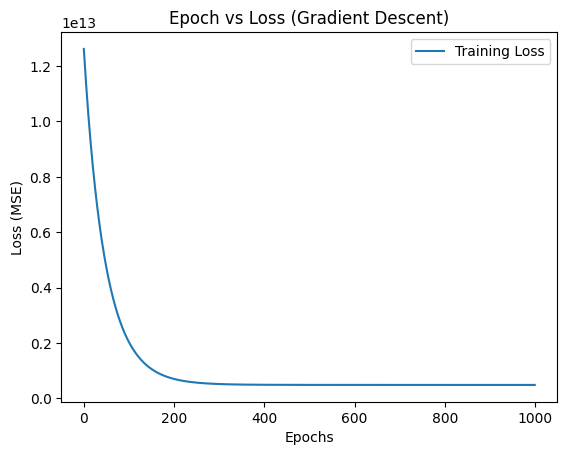

In [ ]:
# Plot Epoch vs Loss
plt.plot(range(len(model.loss_history)), model.loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Epoch vs Loss (Gradient Descent)")
plt.legend()
plt.show()

- plt.plot(model.loss_history) → plots loss values across epochs.

- plt.xlabel("Epochs") / plt.ylabel("MSE Loss") → axis labels.

- plt.title("Training Loss") → adds graph title.

- plt.show() → displays the plot.

In [ ]:
# 4. Compare with scikit-learn Linear Regression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

LinearRegression()

- sk_model = LinearRegression() → creates a scikit-learn linear regression model.

- sk_model.fit(X_train, y_train) → trains it using training data.

In [ ]:
print("\nScratch Linear Regression Weights:\n", model.weights)
print("Scratch Bias:", model.bias)
print("\nSklearn Linear Regression Coefficients:\n", sk_model.coef_)
print("Sklearn Intercept:", sk_model.intercept_)


Scratch Linear Regression Weights:
 [ 510669.17181484   60534.52121575  549479.09602034  349691.34249847
  128538.99623266   90202.81304672  185931.97914325  144179.81462294
  365956.22046845  194216.7143505   266664.57067729 -160442.2148827 ]
Scratch Bias: 4738257.281286292

Sklearn Linear Regression Coefficients:
 [ 511355.31486431   57939.76418471  550762.10873532  352072.08634443
  127770.25363585   89178.0079421   187581.88438844  143909.24149324
  365086.93393877  194330.06533066  267023.36435044 -160043.58443798]
Sklearn Intercept: 4738612.162870701


- model.weights, model.bias → learned parameters from your scratch model.

- sk_model.coef_, sk_model.intercept_ → coefficients and intercept from scikit-learn.